## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman1Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1
bias = 1 

In [4]:
# Parameters
variance = 0.01
bias = 0.1


## Dataset 


In [5]:
#Parameters 
n_features = 5
n_samples= 100
n_target = 1 

In [6]:
X,Y = friedman1Dataset.friedman1_data(n_samples,n_features)

         X0        X1        X2        X3        X4         Y
0  0.091535  1.138705 -0.403575 -0.646596  1.201760  0.530311
1 -0.956848  0.517593  0.834512 -0.948312 -1.156519 -1.216907
2  0.780686 -1.545467 -1.336872  0.635033  0.199684 -0.045736
3  1.095122  0.625378 -0.150947 -0.202979  0.026158  0.541184
4 -1.703010 -0.390748 -0.783152 -1.580601 -0.702065 -2.357907


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.024897
0:	learn: 0.9706845	total: 57.7ms	remaining: 57.7s
1:	learn: 0.9606893	total: 58.2ms	remaining: 29s
2:	learn: 0.9497711	total: 58.8ms	remaining: 19.5s
3:	learn: 0.9393613	total: 59.2ms	remaining: 14.7s
4:	learn: 0.9295150	total: 59.7ms	remaining: 11.9s
5:	learn: 0.9204469	total: 60.1ms	remaining: 9.96s
6:	learn: 0.9083103	total: 60.7ms	remaining: 8.61s
7:	learn: 0.8981310	total: 61.4ms	remaining: 7.61s
8:	learn: 0.8890146	total: 61.9ms	remaining: 6.81s
9:	learn: 0.8790624	total: 62.3ms	remaining: 6.17s
10:	learn: 0.8703311	total: 63ms	remaining: 5.66s
11:	learn: 0.8601623	total: 63.5ms	remaining: 5.23s
12:	learn: 0.8513167	total: 63.9ms	remaining: 4.85s
13:	learn: 0.8410221	total: 64.3ms	remaining: 4.53s
14:	learn: 0.8329252	total: 64.7ms	remaining: 4.25s
15:	learn: 0.8248639	total: 65.1ms	remaining: 4s
16:	learn: 0.8166807	total: 65.7ms	remaining: 3.8s
17:	learn: 0.8084755	total: 66.3ms	remaining: 3.62s
18:	learn: 0.8005790	total: 66.8ms	remaining: 3.45s


108:	learn: 0.3634200	total: 108ms	remaining: 885ms
109:	learn: 0.3609692	total: 109ms	remaining: 882ms
110:	learn: 0.3579949	total: 109ms	remaining: 876ms
111:	learn: 0.3552188	total: 110ms	remaining: 871ms
112:	learn: 0.3525008	total: 110ms	remaining: 866ms
113:	learn: 0.3500059	total: 111ms	remaining: 861ms
114:	learn: 0.3475875	total: 111ms	remaining: 856ms
115:	learn: 0.3451744	total: 112ms	remaining: 851ms
116:	learn: 0.3421855	total: 112ms	remaining: 846ms
117:	learn: 0.3392933	total: 112ms	remaining: 840ms
118:	learn: 0.3369724	total: 113ms	remaining: 836ms
119:	learn: 0.3344658	total: 113ms	remaining: 832ms
120:	learn: 0.3322729	total: 114ms	remaining: 827ms
121:	learn: 0.3297841	total: 114ms	remaining: 822ms
122:	learn: 0.3271988	total: 115ms	remaining: 818ms
123:	learn: 0.3246409	total: 115ms	remaining: 814ms
124:	learn: 0.3226781	total: 116ms	remaining: 810ms
125:	learn: 0.3200835	total: 116ms	remaining: 806ms
126:	learn: 0.3175769	total: 117ms	remaining: 801ms
127:	learn: 

271:	learn: 0.1180229	total: 187ms	remaining: 499ms
272:	learn: 0.1171549	total: 187ms	remaining: 498ms
273:	learn: 0.1161635	total: 188ms	remaining: 497ms
274:	learn: 0.1151570	total: 188ms	remaining: 496ms
275:	learn: 0.1143655	total: 189ms	remaining: 495ms
276:	learn: 0.1134765	total: 189ms	remaining: 494ms
277:	learn: 0.1127856	total: 190ms	remaining: 493ms
278:	learn: 0.1119523	total: 190ms	remaining: 492ms
279:	learn: 0.1110833	total: 191ms	remaining: 491ms
280:	learn: 0.1102223	total: 191ms	remaining: 490ms
281:	learn: 0.1095582	total: 192ms	remaining: 489ms
282:	learn: 0.1088504	total: 192ms	remaining: 487ms
283:	learn: 0.1080601	total: 193ms	remaining: 486ms
284:	learn: 0.1071996	total: 193ms	remaining: 485ms
285:	learn: 0.1064161	total: 194ms	remaining: 484ms
286:	learn: 0.1057584	total: 194ms	remaining: 483ms
287:	learn: 0.1050410	total: 195ms	remaining: 482ms
288:	learn: 0.1042680	total: 195ms	remaining: 480ms
289:	learn: 0.1036739	total: 196ms	remaining: 479ms
290:	learn: 

490:	learn: 0.0321492	total: 291ms	remaining: 302ms
491:	learn: 0.0319657	total: 292ms	remaining: 302ms
492:	learn: 0.0317958	total: 293ms	remaining: 301ms
493:	learn: 0.0315913	total: 293ms	remaining: 300ms
494:	learn: 0.0314312	total: 293ms	remaining: 299ms
495:	learn: 0.0312976	total: 294ms	remaining: 299ms
496:	learn: 0.0311066	total: 294ms	remaining: 298ms
497:	learn: 0.0309203	total: 295ms	remaining: 297ms
498:	learn: 0.0308224	total: 295ms	remaining: 297ms
499:	learn: 0.0307050	total: 296ms	remaining: 296ms
500:	learn: 0.0306095	total: 296ms	remaining: 295ms
501:	learn: 0.0304449	total: 297ms	remaining: 294ms
502:	learn: 0.0302918	total: 297ms	remaining: 294ms
503:	learn: 0.0301362	total: 298ms	remaining: 293ms
504:	learn: 0.0299604	total: 298ms	remaining: 292ms
505:	learn: 0.0298674	total: 299ms	remaining: 292ms
506:	learn: 0.0297083	total: 299ms	remaining: 291ms
507:	learn: 0.0295841	total: 300ms	remaining: 290ms
508:	learn: 0.0293680	total: 300ms	remaining: 289ms
509:	learn: 

656:	learn: 0.0149365	total: 370ms	remaining: 193ms
657:	learn: 0.0149009	total: 371ms	remaining: 193ms
658:	learn: 0.0148165	total: 372ms	remaining: 192ms
659:	learn: 0.0147420	total: 372ms	remaining: 192ms
660:	learn: 0.0146735	total: 372ms	remaining: 191ms
661:	learn: 0.0146220	total: 373ms	remaining: 190ms
662:	learn: 0.0145557	total: 373ms	remaining: 190ms
663:	learn: 0.0144752	total: 374ms	remaining: 189ms
664:	learn: 0.0144300	total: 374ms	remaining: 188ms
665:	learn: 0.0143956	total: 374ms	remaining: 188ms
666:	learn: 0.0143619	total: 375ms	remaining: 187ms
667:	learn: 0.0142959	total: 375ms	remaining: 187ms
668:	learn: 0.0142578	total: 376ms	remaining: 186ms
669:	learn: 0.0141873	total: 376ms	remaining: 185ms
670:	learn: 0.0141500	total: 377ms	remaining: 185ms
671:	learn: 0.0141133	total: 377ms	remaining: 184ms
672:	learn: 0.0140758	total: 377ms	remaining: 183ms
673:	learn: 0.0140366	total: 378ms	remaining: 183ms
674:	learn: 0.0139399	total: 378ms	remaining: 182ms
675:	learn: 

876:	learn: 0.0071615	total: 474ms	remaining: 66.5ms
877:	learn: 0.0071462	total: 475ms	remaining: 66ms
878:	learn: 0.0071290	total: 475ms	remaining: 65.4ms
879:	learn: 0.0071052	total: 476ms	remaining: 64.8ms
880:	learn: 0.0070882	total: 476ms	remaining: 64.3ms
881:	learn: 0.0070616	total: 476ms	remaining: 63.7ms
882:	learn: 0.0070477	total: 477ms	remaining: 63.2ms
883:	learn: 0.0070342	total: 477ms	remaining: 62.6ms
884:	learn: 0.0070178	total: 478ms	remaining: 62.1ms
885:	learn: 0.0069836	total: 478ms	remaining: 61.5ms
886:	learn: 0.0069502	total: 479ms	remaining: 61ms
887:	learn: 0.0069334	total: 479ms	remaining: 60.4ms
888:	learn: 0.0069126	total: 480ms	remaining: 59.9ms
889:	learn: 0.0068854	total: 480ms	remaining: 59.4ms
890:	learn: 0.0068714	total: 481ms	remaining: 58.8ms
891:	learn: 0.0068510	total: 481ms	remaining: 58.3ms
892:	learn: 0.0068247	total: 482ms	remaining: 57.7ms
893:	learn: 0.0067991	total: 482ms	remaining: 57.2ms
894:	learn: 0.0067901	total: 483ms	remaining: 56.6

In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape) + bias 
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)
mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mae)

# ABC GAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

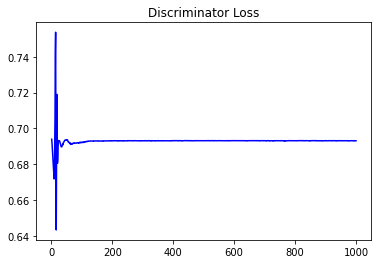

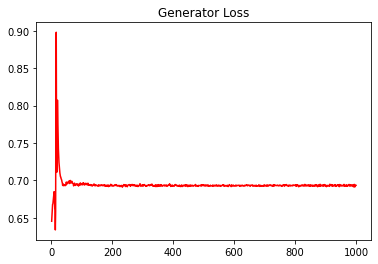

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
0.1686176898800729


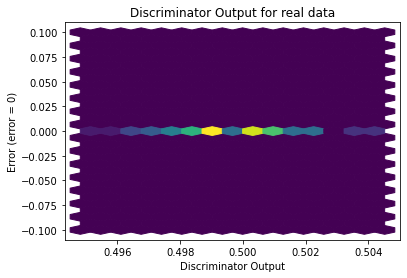

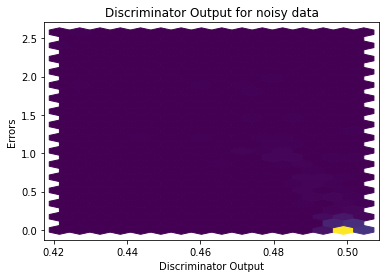

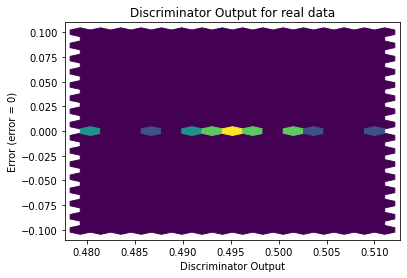

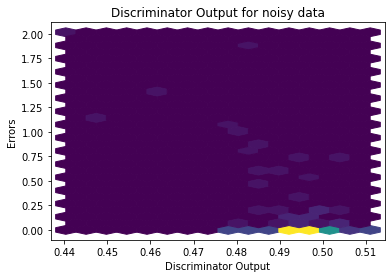

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# ABC - GAN Model with skip connection

In [15]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


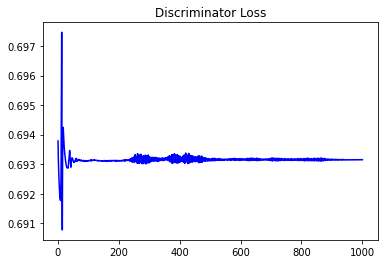

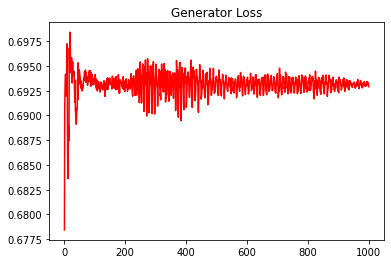

In [16]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [17]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,bias,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.22127890375243925


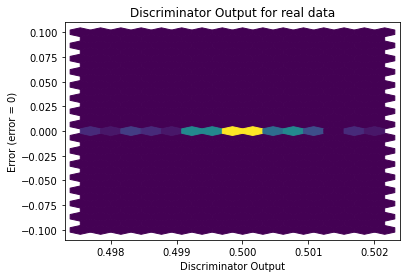

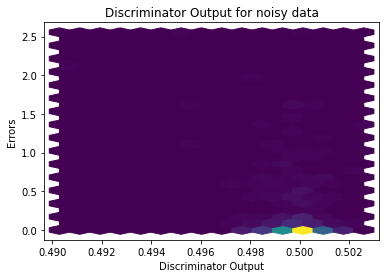

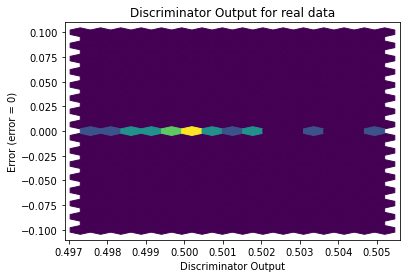

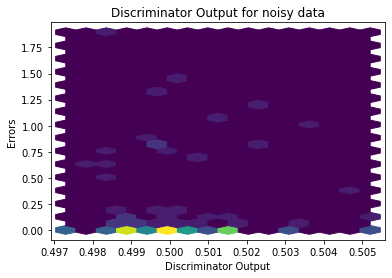

In [18]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [19]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.0446]], requires_grad=True)
